In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import os

import matplotlib.pyplot as plt

DATA_PATH = 'COVID-19/csse_covid_19_daily_reports_us/'

README = 'README.md'

RM_STATES = ['Recovered', 'Diamond Princess', 'Grand Princess']

In [2]:
# NOTE: files in the folder must follow the format YYYY-MM-DD

first_file = ''
state_list, lat_list, long_list,  = None, None, None
confirmed, deaths, incidence, fatality = [], [], [], []
# Iterate over all files in the folder
for i, filename in enumerate(tqdm(os.listdir(DATA_PATH))):
    if filename == README or not os.path.isfile(DATA_PATH + filename):
        continue

    df = pd.read_csv(DATA_PATH + filename, sep=',')

    # Remove rows that are not US states
    rm_idxs = []
    state_list_aux = df['Province_State']
    for rm_state in RM_STATES:
        idx = state_list_aux[state_list_aux == rm_state].index
        if len(idx) > 0:
            rm_idxs.append( idx[0] )
        
    df = df.drop(rm_idxs)

    # idx_wrong_row = state_list_aux[state_list_aux == 'Recovered'].index    
    # df = df.drop(idx_wrong_row)

    if i == 0:
        state_list = df['Province_State']
        first_file = filename
        lat_list = df['Lat']
        long_list = df['Long_']

    assert len(df['Province_State']) == len(state_list), f'Different number of states in file {filename}, ' + \
        f'{len(df["Province_State"])} != {len(state_list)}'

    confirmed.append( df['Confirmed'] )
    deaths.append( df['Deaths'] )
    incidence.append( df['Incident_Rate'] )
    fatality.append( df['Case_Fatality_Ratio'] )

last_file = filename

print(f'Done reading from file {first_file} to {last_file}')


100%|██████████| 1063/1063 [00:10<00:00, 99.70it/s] 

Done reading from file 2020-04-12.csv to README.md


In [3]:
# To numpy arrays
confirmed_arr = np.array(confirmed).T
deaths_arr = np.array(deaths).T
incidence_arr = np.array(incidence).T
fatality_arr = np.array(fatality).T

print(f'N states: {confirmed_arr.shape[0]}  -  N observations: {confirmed_arr.shape[1]}')

N states: 56  -  N observations: 1062


False
False
False
True
0.20424737691686845


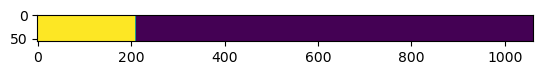

In [4]:
# Look for not a number values
print(np.any(np.isnan(confirmed_arr)))
print(np.any(np.isnan(deaths_arr)))
print(np.any(np.isnan(incidence_arr)))
print(np.any(np.isnan(fatality_arr)))

print(np.sum(np.isnan(fatality_arr))/fatality_arr.size)

# Plot NAN entries
plt.figure()
plt.imshow(np.isnan(fatality_arr))

# Replace NaN Values
fatality_arr[np.isnan(fatality_arr)] = 0

In [5]:
# Standarize
standarize = lambda X: (X - np.nanmean(X, axis=1, keepdims=True)) / np.nanstd(X, axis=1, keepdims=True)
confirmed_std = standarize(confirmed_arr)
deaths_std = standarize(deaths_arr)
incidence_std = standarize(incidence_arr)
fatality_std = standarize(fatality_arr)

In [6]:
# Save data
file_name = './COVID-19/covid_matrices'
np.savez(file_name, confirmed=confirmed_arr, deaths=deaths_arr, incidence=incidence_arr,
         fatality=fatality_arr)
print('Data saved in file:', file_name)

Data saved in file: ./COVID-19/covid_matrices


Text(0.5, 1.0, 'Fatality ratio std')

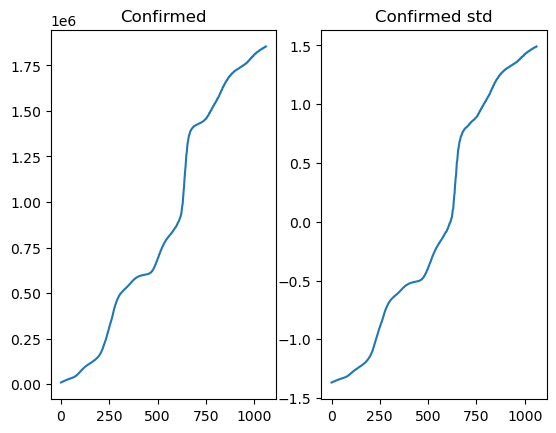

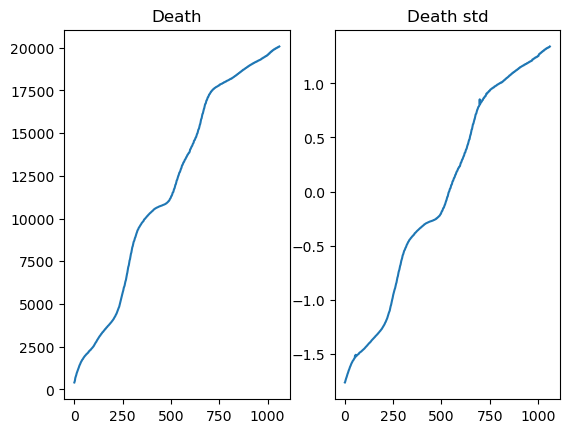

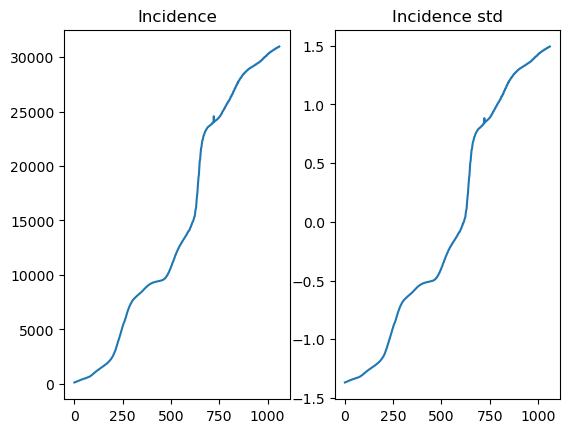

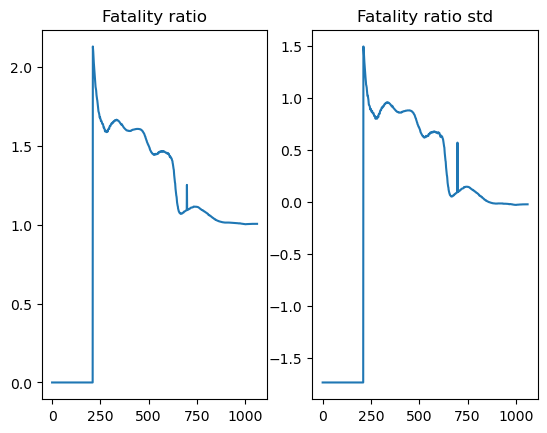

In [7]:
# Plot data
fig, axes = plt.subplots(1,2)
axes[0].plot(confirmed_arr.mean(axis=0))
axes[0].set_title('Confirmed')
axes[1].plot(confirmed_std.mean(axis=0))
axes[1].set_title('Confirmed std')

fig, axes = plt.subplots(1,2)
axes[0].plot(deaths_arr.mean(axis=0))
axes[0].set_title('Death')
axes[1].plot(deaths_std.mean(axis=0))
axes[1].set_title('Death std')

fig, axes = plt.subplots(1,2)
axes[0].plot(incidence_arr.mean(axis=0))
axes[0].set_title('Incidence')
axes[1].plot(incidence_std.mean(axis=0))
axes[1].set_title('Incidence std')

fig, axes = plt.subplots(1,2)
axes[0].plot(fatality_arr.mean(axis=0))
axes[0].set_title('Fatality ratio')
axes[1].plot(fatality_std.mean(axis=0))
axes[1].set_title('Fatality ratio std')

Text(0.5, 1.0, 'Fatality ratio std')

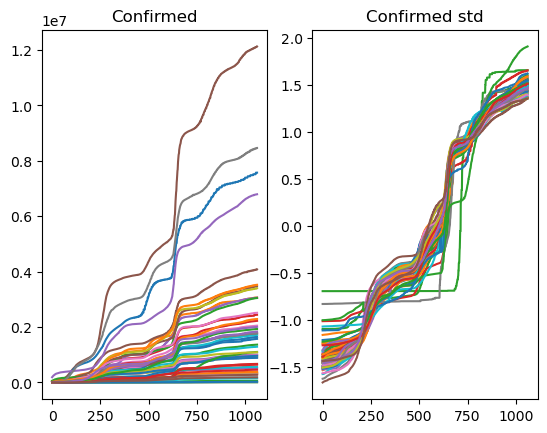

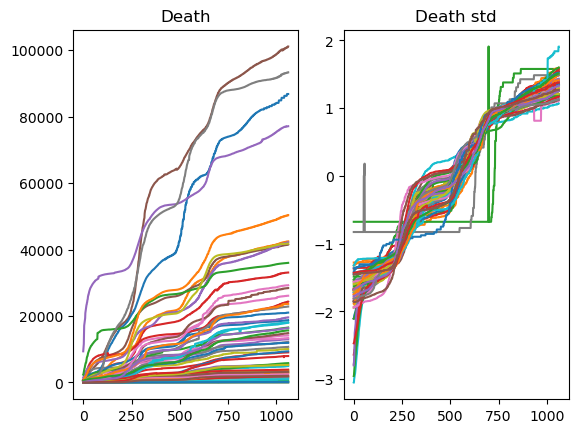

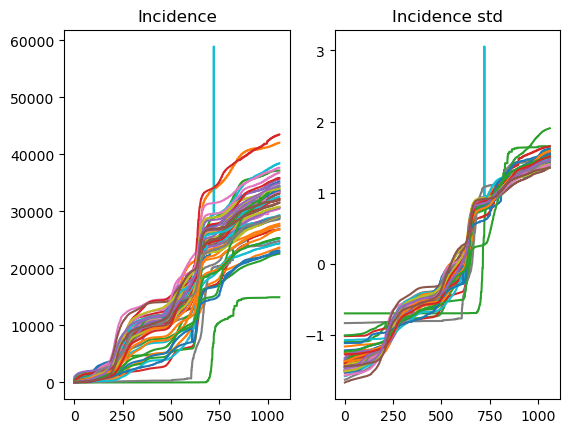

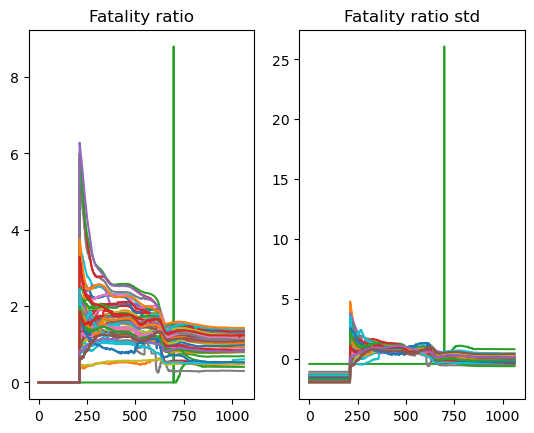

In [8]:
# Plot data
fig, axes = plt.subplots(1,2)
axes[0].plot(confirmed_arr.T)
axes[0].set_title('Confirmed')
axes[1].plot(confirmed_std.T)
axes[1].set_title('Confirmed std')

fig, axes = plt.subplots(1,2)
axes[0].plot(deaths_arr.T)
axes[0].set_title('Death')
axes[1].plot(deaths_std.T)
axes[1].set_title('Death std')

fig, axes = plt.subplots(1,2)
axes[0].plot(incidence_arr.T)
axes[0].set_title('Incidence')
axes[1].plot(incidence_std.T)
axes[1].set_title('Incidence std')

fig, axes = plt.subplots(1,2)
axes[0].plot(fatality_arr.T)
axes[0].set_title('Fatality ratio')
axes[1].plot(fatality_std.T)
axes[1].set_title('Fatality ratio std')

Text(0.5, 1.0, 'Fatality ratio')

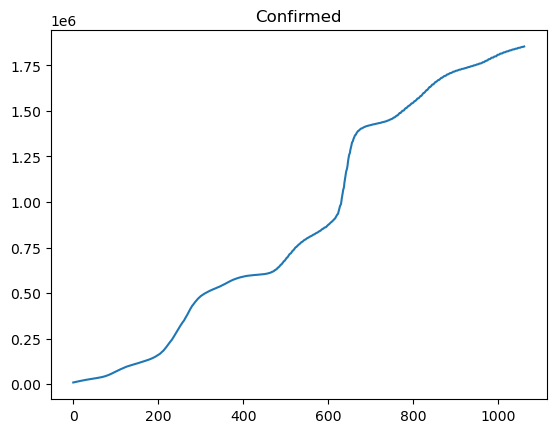

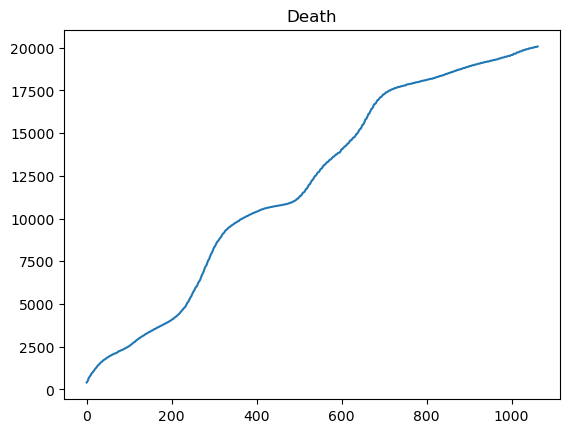

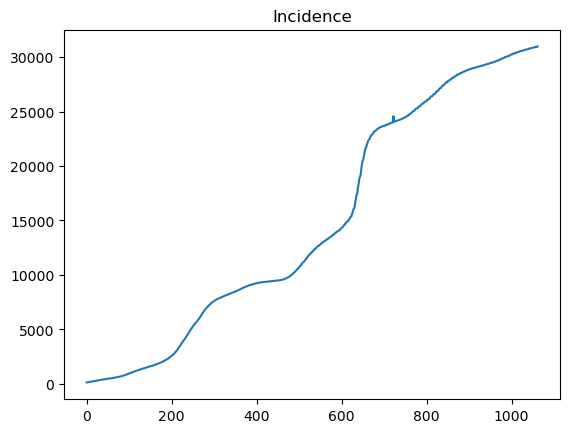

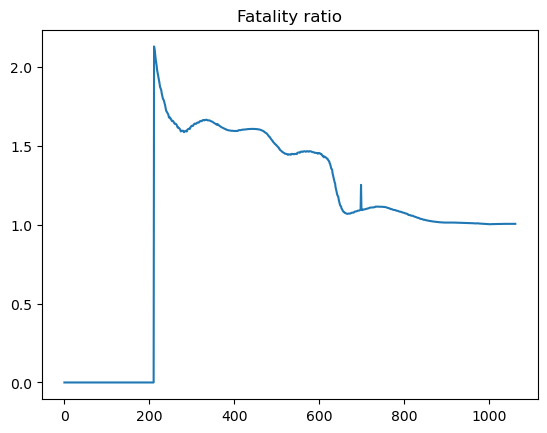

In [9]:
plt.figure()
plt.plot(confirmed_arr.mean(axis=0))
plt.title('Confirmed')

plt.figure()
plt.plot(deaths_arr.mean(axis=0))
plt.title('Death')

plt.figure()
plt.plot(incidence_arr.mean(axis=0))
plt.title('Incidence')

plt.figure()
plt.plot(fatality_arr.mean(axis=0))
plt.title('Fatality ratio')

In [10]:
# # Files in the folder must follow the format YYYY-MM-DD
# file_name = '2021-01-01.csv'
# df = pd.read_csv(DATA_PATH + file_name, sep=',')

# print(df.shape)
# print(df.head())

# states_list = df['Province_State'].unique()
# print(len(states_list))